# Sorting accuracy

author: laquitainesteeve@gmail.com

Execution time: 50 secs

Tested on Ubuntu 24.04.1 LTS (32 cores, 188 GB RAM, Intel(R) Core(TM) i9-14900K ＠3.2 GHz/5.8 GHz) with RTX 5090 GPU with 40GB VRAM (GPU not needed)



## Setup

activate `spikebias`

In [43]:
%load_ext autoreload
%autoreload 2
import os 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spikeinterface as si
from scipy import stats

# set project path
proj_path = "/home/steeve/steeve/epfl/code/spikebias/"
os.chdir(proj_path)

from src.nodes import utils
from src.nodes.analysis.accuracy import accuracy as acc

# PARAMETERS
DUR = 600 # 10 minutes recording
DT = 1.3 # ms (optimized)
THR_GOOD = 0.8

# ground truth paths
GT_PATH = {
    "Buccino": 'dataset/00_raw/ground_truth_buccino/',
    'Buccino\nrep': 'dataset/00_raw/ground_truth_buccino_rep/',
    's2\ncell count': 'dataset/00_raw/ground_truth_synth2/',
    's3\nf.rate': 'dataset/00_raw/ground_truth_synth3/',
    's4\nf.range': 'dataset/00_raw/ground_truth_synth4/',
    's5:SNR': 'dataset/00_raw/ground_truth_synth5/',
    "NS": 'dataset/00_raw/ground_truth_npx_spont/',
}

# sorted data paths
SORTED_PATH = {
    "Buccino": 'dataset/01_intermediate/sorting/buccino/SortingKS4',
    'Buccino\nrep': './temp/pros_of_details/npx_buccino_rep/SortingKS4_10m_RTX5090',
    's2\ncell count': './temp/pros_of_details/npx_synth2/SortingKS4_10m_RTX5090',
    's3\nf.rate': './temp/pros_of_details/npx_synth3/SortingKS4_10m_RTX5090',
    's4\nf.range': './temp/pros_of_details/npx_synth4/SortingKS4_10m_RTX5090',
    's5:SNR': './temp/pros_of_details/npx_synth5/SortingKS4_10m_RTX5090',
    "NS": 'dataset/01_intermediate/sorting/npx_spont/SortingKS4_10m',
}

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5 # typically between 0.5 and 1
plt.rcParams["axes.linewidth"] = 0.5 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
legend_cfg = {"frameon": False, "handletextpad": 0.5}
tight_layout_cfg = {"pad": 0.001}
LG_FRAMEON = False              # no legend frame
savefig_cfg = {"transparent":True, "dpi": 400}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Custom function

In [29]:
def get_good_unit_yield_and_accuracy(acc_data):
    well_detected = sum(acc_data >= 0.8)
    acc = well_detected / len(acc_data)
    return acc, well_detected

## Compute and plot

CPU times: user 29.8 s, sys: 3.99 s, total: 33.8 s
Wall time: 33.6 s


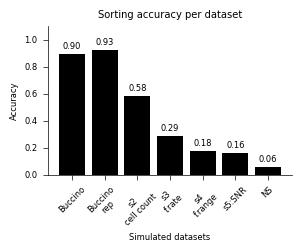

In [47]:
%%time 

# compute accuracies
accuracies = []
well_detected_units = []
for dataset in datasets:
    acc_data = acc.get_accuracy_for(SORTED_PATH[dataset], GT_PATH[dataset], DT)
    acc_value, well_detected_value = get_good_unit_yield_and_accuracy(acc_data)
    accuracies.append(acc_value)
    well_detected_units.append(well_detected_value)
    #print(f"{dataset} accuracy: {acc_value}; good unit yield: {well_detected_value}")

# setup plot
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.bar(datasets, accuracies, color='k')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Simulated datasets")
ax.set_title("Sorting accuracy per dataset")
ax.set_ylim(0, 1.1)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

# add accuracy values on top of each bar
for i, acc_value in enumerate(accuracies):
    ax.text(i, acc_value + 0.02, f"{acc_value:.2f}", ha='center', va='bottom', fontsize=6)

# aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# save fig
plt.savefig("figures/7_reviews/figC_pros_of_details_accuracy.svg", **savefig_cfg)
plt.savefig("figures/7_reviews/figC_pros_of_details_accuracy.pdf", **savefig_cfg)